In [1]:
import tensorflow as tf # deep learning modeling
import pandas as pd # reading and processing data
import seaborn as sns # visualizations
from tensorflow.keras.layers import Normalization,Dense
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError, Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

In [2]:
filepath = "/content/train.csv"

In [4]:
data = pd.read_csv(filepath,sep=",")

In [5]:
data.shape

(1000, 12)

In [6]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [9]:
shuffled_data = tf.random.shuffle(data)

In [10]:
X = shuffled_data[:,3:-1]
y = tf.expand_dims(shuffled_data[:,-1],-1)

In [11]:
print(X.shape,y.shape)

(1000, 8) (1000, 1)


In [12]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [13]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)
print(DATASET_SIZE)

1000


In [14]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape,y_train.shape)

(800, 8) (800, 1)


In [15]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape,y_val.shape)

(100, 8) (100, 1)


In [16]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape,y_test.shape)

(100, 8) (100, 1)


In [17]:
BUFFER_SIZE = 16
BATCH_SIZE = 64

In [18]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [19]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val))
val_dataset = val_dataset.shuffle(buffer_size = BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [21]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))
test_dataset = test_dataset.shuffle(buffer_size = BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [22]:
for i,j in train_dataset:
  print(i.shape,j.shape)
  break

(64, 8) (64, 1)


In [23]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.3156923 , -1.3602121 ,  0.01243762,  0.14634287,  0.137586  ,
        -1.0098958 ,  0.68447214, -0.7892449 ],
       [ 1.438154  ,  1.6443821 ,  1.4338857 , -1.6329013 , -1.6742457 ,
        -0.48530874, -0.8884617 , -0.7421223 ],
       [ 0.8535385 ,  1.1200697 ,  0.01243762, -0.56535476,  1.4964598 ,
        -0.6426849 , -0.9867701 ,  1.5668861 ],
       [-1.4849231 , -0.3570497 , -1.4090104 ,  1.2138894 ,  1.4964598 ,
         1.0359939 , -0.15114896,  0.4830658 ],
       [ 0.8535385 , -1.1263084 ,  1.4338857 , -1.2770524 ,  0.137586  ,
         1.3507462 ,  1.2743224 ,  0.81292415]], dtype=float32)>

In [24]:
model = tf.keras.Sequential([
    normalizer,
    Dense(256),
    Dense(256),
    Dense(128),
    Dense(1),
],name="first-model")
model(X_train[:BATCH_SIZE])
model.summary()


Model: "first-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (64, 8)                │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 256)              │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 256)              │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (64, 1)                │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,138 (395.07 KB)

 Trainable params: 101,121 (395.00 KB)

 Non-trainable params: 17 (72.00 B)

In [26]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()])

In [27]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,epochs = 150, verbose = 1)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 263725.3125 - root_mean_squared_error: 299445.5625 - val_loss: 109765.4688 - val_root_mean_squared_error: 130963.8984
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77630.6484 - root_mean_squared_error: 97406.2500 - val_loss: 46458.9414 - val_root_mean_squared_error: 57607.3828
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41950.2734 - root_mean_squared_error: 53112.1562 - val_loss: 39357.3516 - val_root_mean_squared_error: 48604.4844
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39411.1641 - root_mean_squared_error: 48624.6172 - val_loss: 39458.1367 - val_root_mean_squared_error: 48011.2773
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38828.2891 - root_mean_squared_error: 47862.6953 - val_loss: 40376.7852 - val_root_mean_squared_error: 48688.1133
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45103.3555 - root_mean_squared_error: 55892.1094 - val_loss: 37553.7656

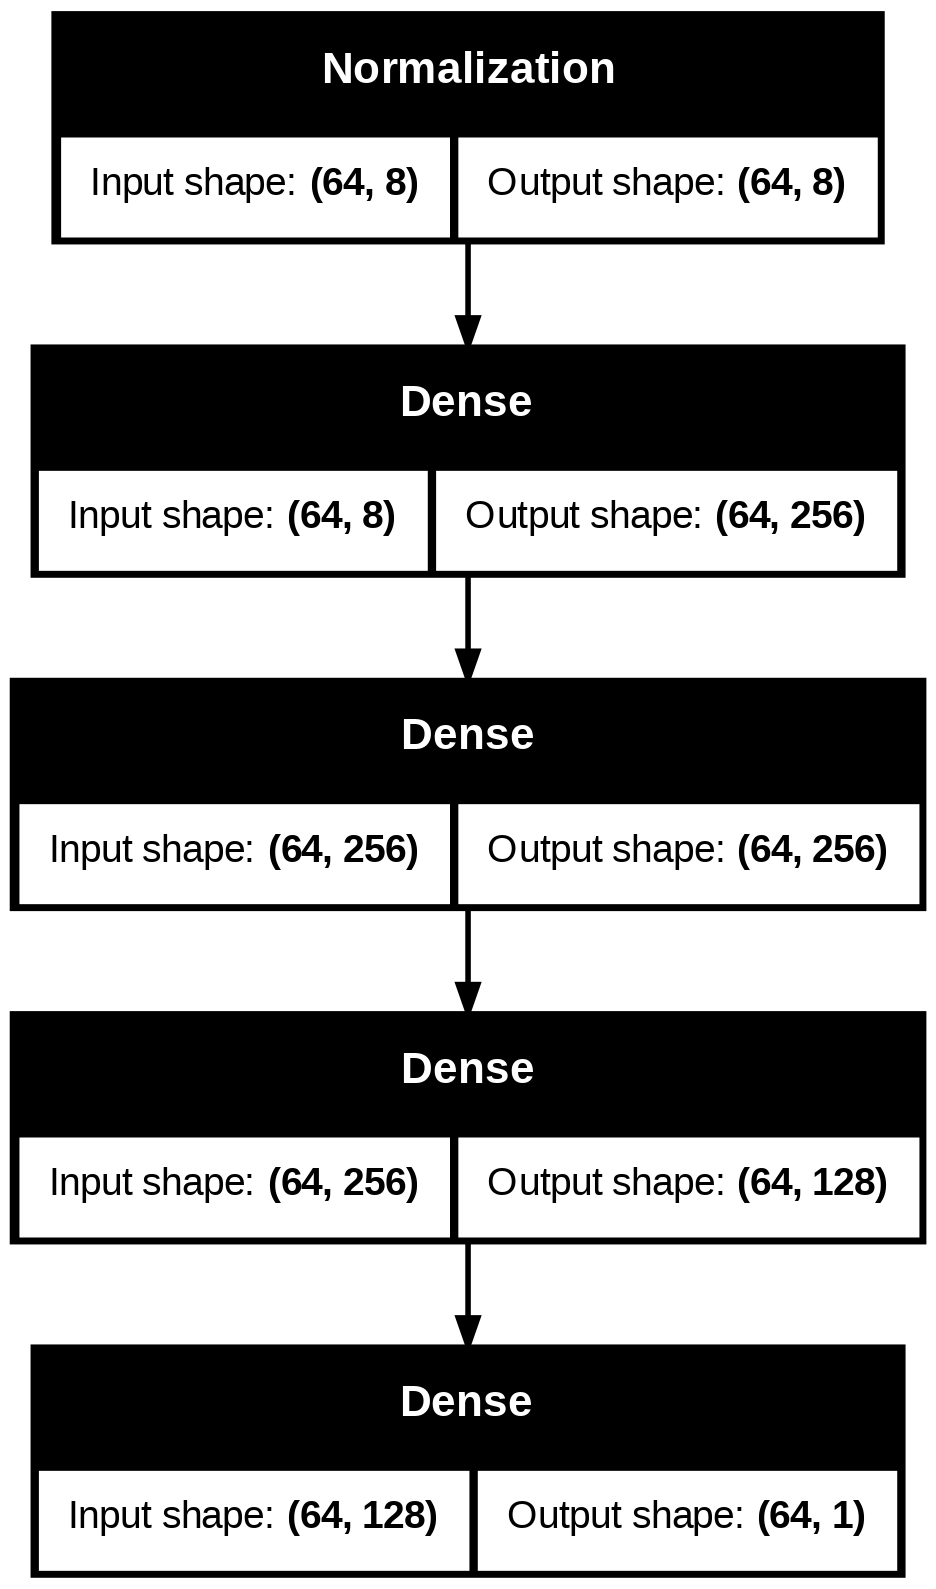

In [28]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

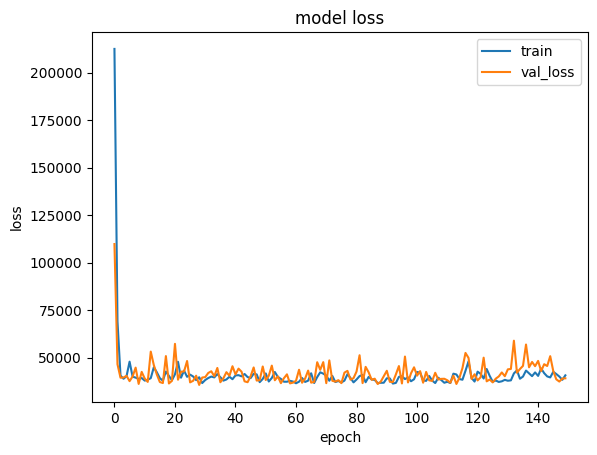

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

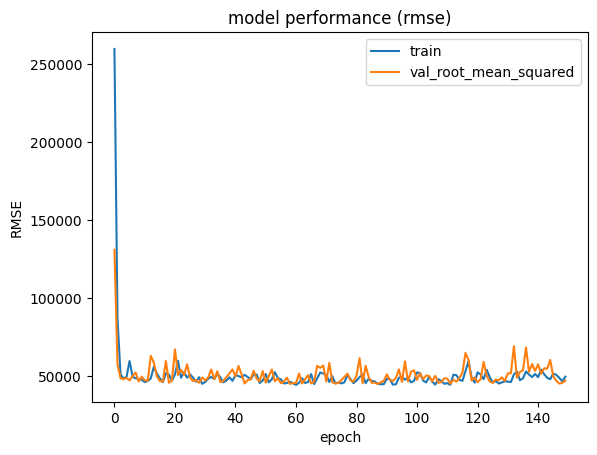

In [30]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance (rmse)')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train','val_root_mean_squared'])
plt.show()

In [31]:
model.evaluate(val_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38367.7266 - root_mean_squared_error: 46676.5547


[39047.90625, 46951.19140625]

In [32]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35454.3906 - root_mean_squared_error: 43549.7695


[35395.1015625, 43085.01171875]

In [33]:
X_test[0]

<tf.Tensor: shape=(8,), dtype=float64, numpy=
array([3.000e+00, 6.188e+04, 3.000e+00, 8.000e+00, 1.000e+01, 1.790e+02,
       1.020e+02, 8.100e+01])>

In [35]:
y_output = model.predict(tf.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [36]:
print(y_output)

[[486325.12]]


In [37]:
y_pred = model(X_test)[:,0].numpy()
print(y_pred)

[486325.1   257309.61  372770.25  410311.44  206967.19  240836.23
 104123.97  243753.58  174827.78  424764.56  153444.97  498638.4
 208860.06  319419.97  390240.6   154470.83  331319.44  382398.25
 217530.67  125971.734 304525.25  145400.25  449155.03  392637.56
 424977.9   332550.88  303753.38  347587.75  111802.31  238040.81
 235504.92  186149.78  310176.9   322952.88  427791.9   337208.12
 267175.94  390036.5   363986.2   432933.88  388905.12  316459.2
 157470.97  365816.7   241627.25  243241.55  462187.88  442557.38
 121596.92  225501.34  372720.12  314108.06  289209.2   320319.06
 114204.125 277236.38  244220.4   108560.7   463772.28  167779.08
 468729.22  291892.84  424694.38  369002.4   466512.7   246221.4
 318745.88  165327.69  344769.12  281674.94  140035.78  458274.16
 247373.88  129101.78  148050.56  391743.16  180524.3   446482.9
 519716.    304657.25  235458.6   455024.06  400061.84  290035.94
 468271.88  281077.    145620.61  106742.984 523559.    312232.
 349768.97  1512

In [38]:
y_true = y_test[:,0].numpy()
print(y_true)

[505223.5 218908.  357823.  494542.  146787.  265194.  207552.  274453.5
 159647.  381846.5  81507.5 553901.  230797.  330887.  379491.  144124.
 283184.  450198.5 172415.   82848.  301042.5  69231.5 453672.5 453069.
 421679.5 341328.  308376.5 326161.5 110229.5 248983.  224533.5 228892.5
 343416.5 320008.  441863.5 348535.  314149.  392864.  420083.  464634.5
 349780.  292520.5 164649.5 337327.  295021.  273674.5 513722.5 455824.5
 111175.5 130233.5 352284.5 295013.  261568.  432159.5 107500.5 322204.
 260231.  134035.  398023.   98254.  500164.  322368.  426796.5 316652.
 501083.5 221132.5 380231.  100927.  275757.  229749.5  64531.  459686.5
 311773.5  94467.5 191566.  367734.5 122225.5 446487.5 508432.  336038.
 264084.5 474281.5 441865.  334502.  438223.  253476.5 145880.5  53470.5
 468543.  223594.5 385248.5 103742.5 307993.  433627.  175012.5 256356.
 218814.  285001.5 109367.  204833.5]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

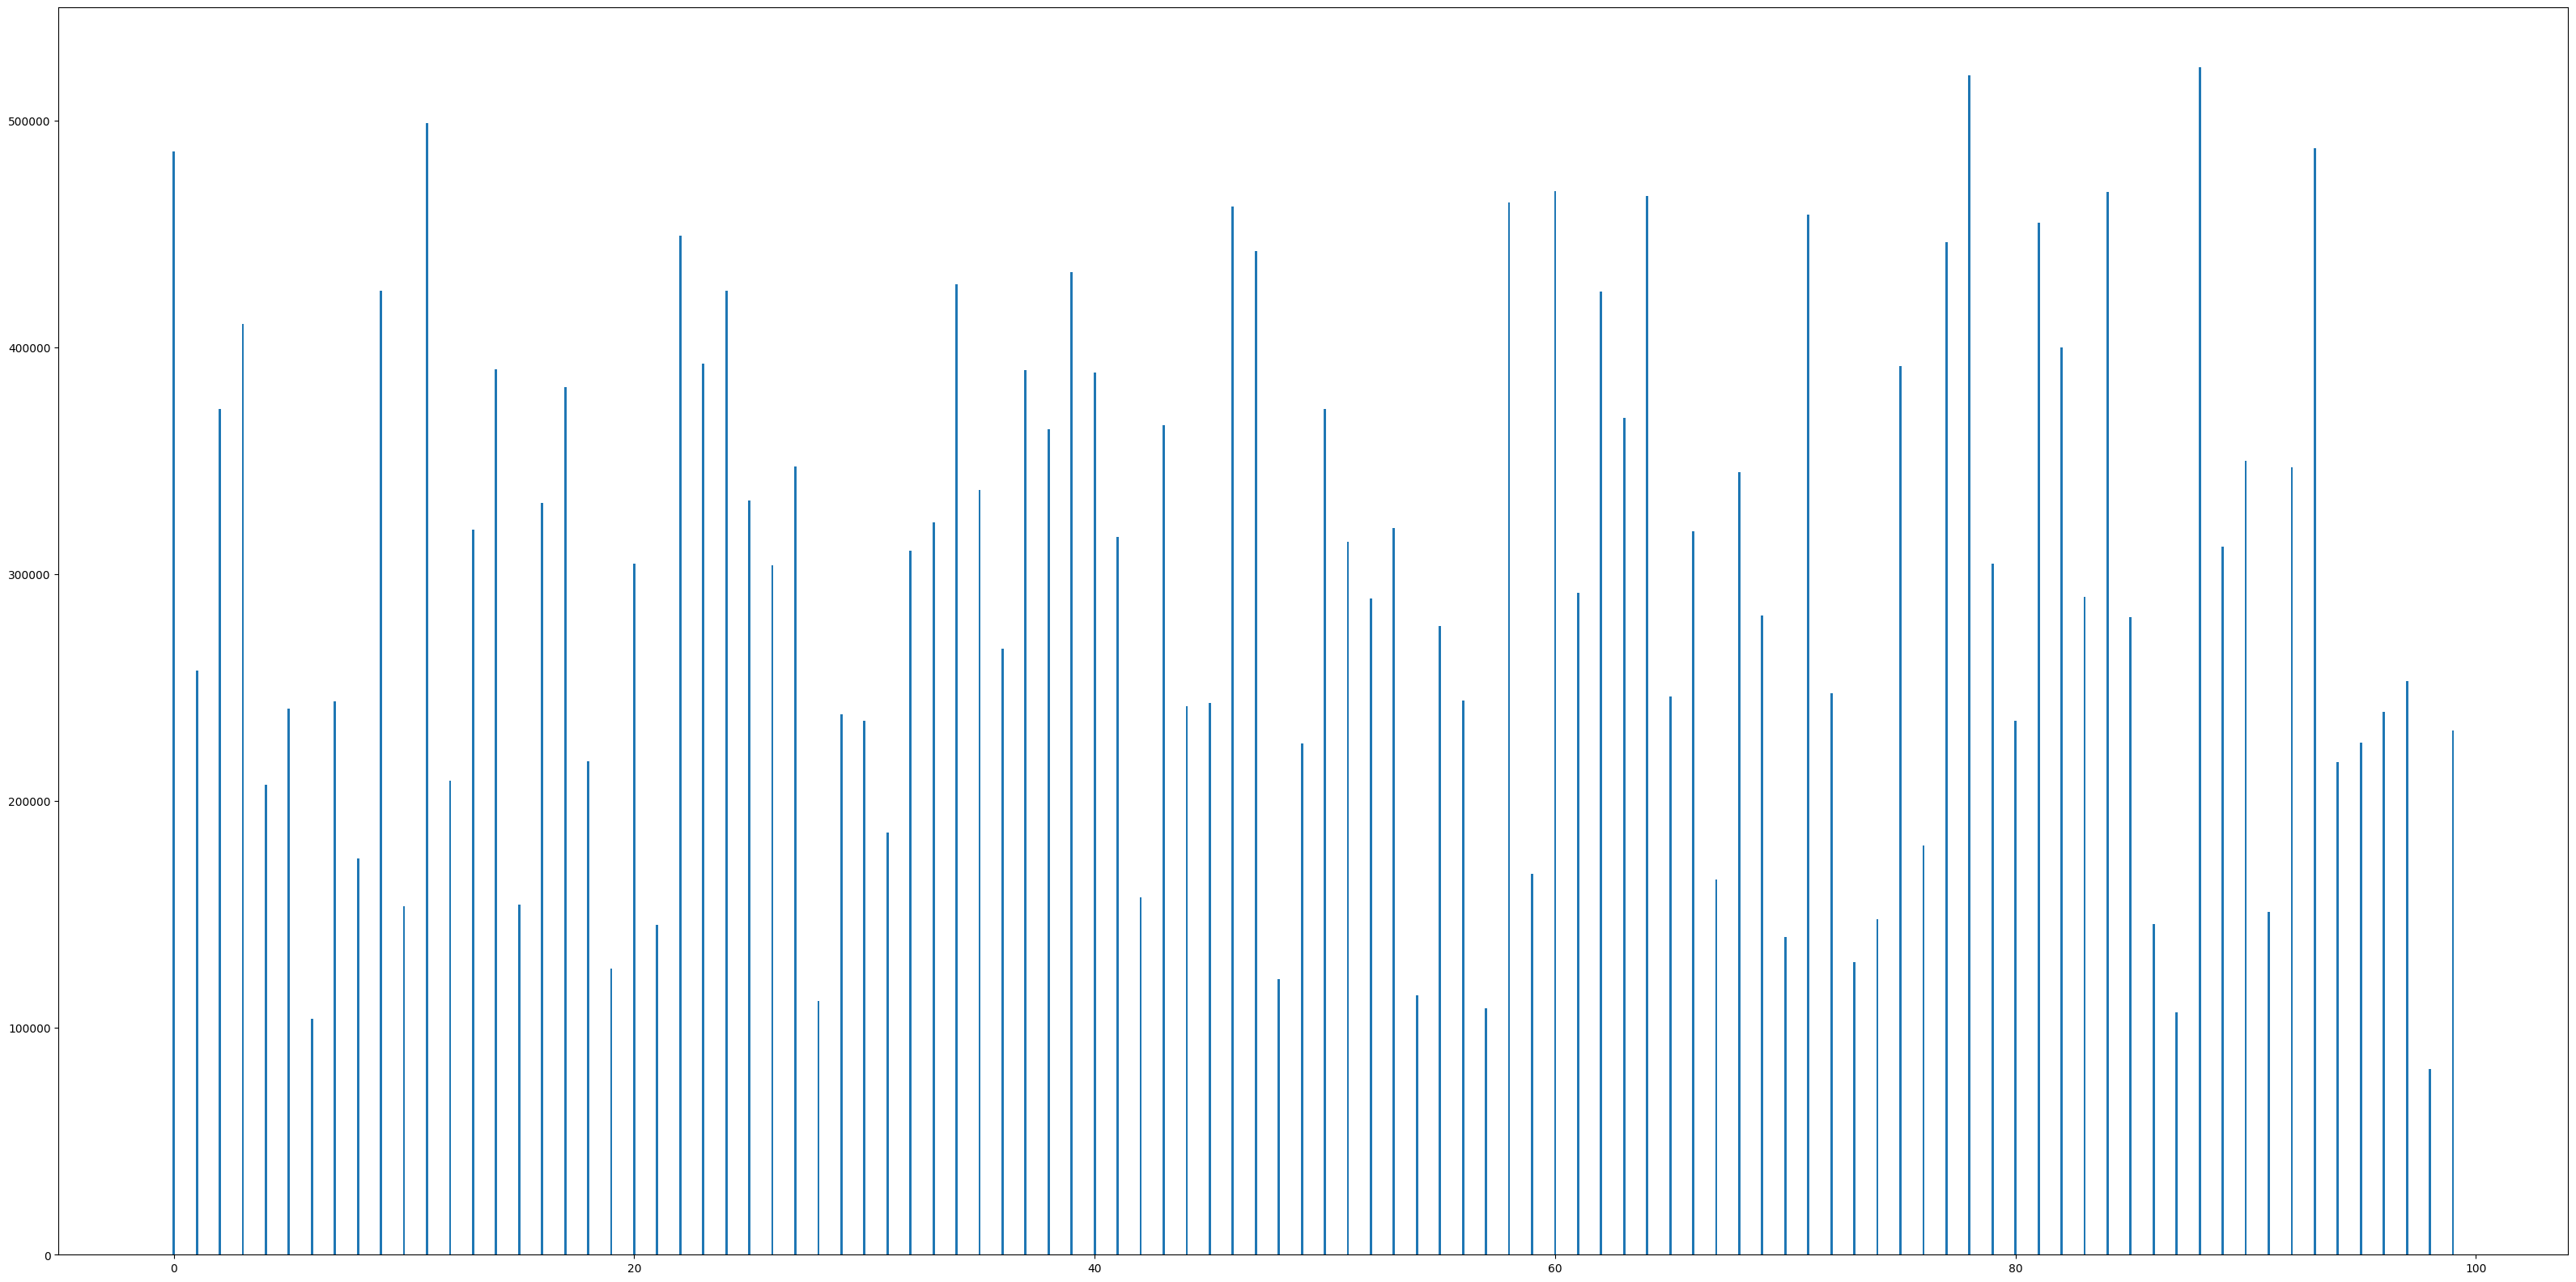

In [47]:
plt.figure(figsize = (40,20))

width = 0.1

plt.bar(tf.range(100).numpy(), y_pred, width, label='Model prediction')
plt.bar(tf.range(100).numpy()+width, y_true[:,0].numpy(), width, label='Actual Car Price')

plt.xlabel("Actual vs Predicted Price")
plt.ylabel("Car Price ")
plt.legend()
plt.show()